In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
from pyproj import Transformer


%matplotlib inline
ox.__version__

'1.1.1'

In [2]:
place =  [{"city": "San Sebastian", "country": "Spain"}]
G = ox.graph_from_place(place, network_type="drive")

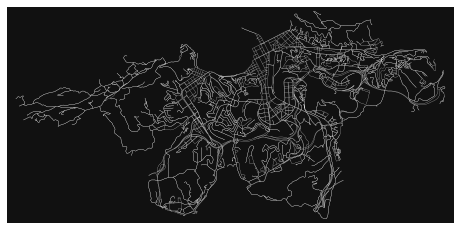

In [4]:
fig, ax = ox.plot_graph(G, node_size=0, edge_color="w", edge_linewidth=0.2)

In [5]:

G_walk= ox.graph_from_place(place, network_type="walk")

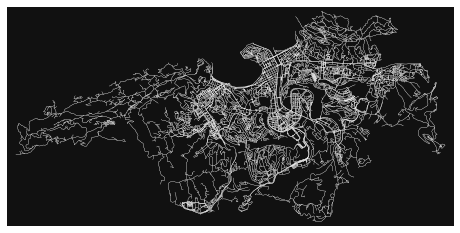

In [7]:
fig, ax = ox.plot_graph(G_walk, node_size=0, edge_color="w", edge_linewidth=0.2)

In [8]:
G_bike= ox.graph_from_place(place, network_type="bike")

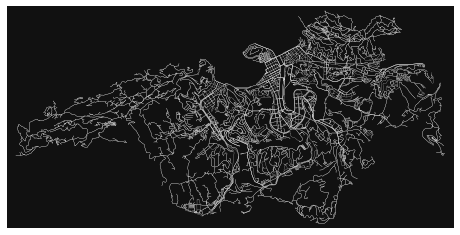

In [9]:
fig, ax = ox.plot_graph(G_bike, node_size=0, edge_color="w", edge_linewidth=0.2)

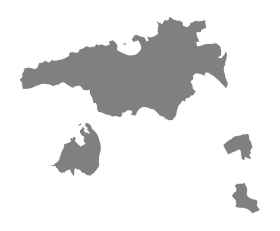

In [10]:
gdf = ox.geocode_to_gdf(place)
gdf_proj = ox.project_gdf(gdf)
ax = gdf_proj.plot(fc="gray", ec="w")
_ = ax.axis("off")

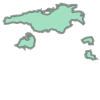

In [11]:
donosti_b=gdf.loc[0,'geometry']
donosti_b

In [26]:
gdf.to_file('./data/donostifull-boundary.geojson')

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


Edited with QGIS to remove the islands

In [3]:
#boundary_json = gpd.read_file('boundary_SS.geojson')

#Square boundary
boundary_json = gpd.read_file('./boundary/small_boundary.geojson')

In [4]:
poly=boundary_json.loc[0,'geometry']

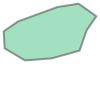

In [5]:
poly

<AxesSubplot:>

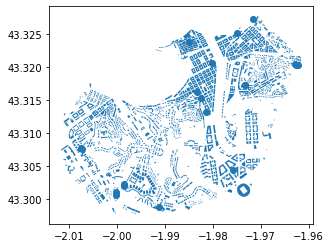

In [97]:
gdf_building = ox.geometries_from_polygon(poly, tags={"building": True})
gdf_building.plot()

In [98]:
gdf_building

source  \
element_type osmid              
node         620097227    NaN   
             811292250    NaN   
             811292355    NaN   
             827308244    b5m   
             834662760    b5m   
...                       ...   
relation     11979391     NaN   
             11982221     NaN   
             15857750     NaN   
             15857751     NaN   
             15857752     NaN   

                                                                 geometry  \
element_type osmid                                                          
node         620097227                          POINT (-1.98021 43.32069)   
             811292250                          POINT (-2.00015 43.30055)   
             811292355                          POINT (-2.00021 43.30104)   
             827308244                          POINT (-1.97332 43.31732)   
             834662760                          POINT (-1.99850 43.30199)   
...                                                                   ...   
relation     11979391   POLYGON ((-2.01091 43.31153, -2.01053 43.31172...   
             11982221   POLYGON ((-2.00980 43.31205, -2.00941 43.31225...   
             15857750   POLYGON ((-2.00628 43.31124, -2.00593 43.31142...   
             15857751   POLYGON ((-2.00687 43.31010, -2.00642 43.31032...   
             15857752   POLYGON ((-2.00794 43.30955, -2.00753 43.30976...   

                                                          name stars tourism  \
element_type osmid                                                             
node         620097227                         Asesoría Loyola   NaN     NaN   
             811292250                                     NaN   NaN     NaN   
             811292355                                     NaN   NaN     NaN   
             827308244                           Villa Echandi   NaN     NaN   
             834662760                                     NaN   NaN     NaN   
...                                                        ...   ...     ...   
relation     11979391   Enpresa Ikasketen Unibertsitate Eskola   NaN     NaN   
             11982221          Irakasleen Unibertsitate Eskola   NaN     NaN   
             15857750                                      NaN   NaN     NaN   
             15857751                                      NaN   NaN     NaN   
             15857752                                      NaN   NaN     NaN   

                       opening_hours wheelchair access amenity  \
element_type osmid                                               
node         620097227           NaN        NaN    NaN     NaN   
             811292250           NaN        NaN    NaN     NaN   
             811292355           NaN        NaN    NaN     NaN   
             827308244           NaN        NaN    NaN     NaN   
             834662760           NaN        NaN    NaN     NaN   
...                              ...        ...    ...     ...   
relation     11979391            NaN        NaN    NaN     NaN   
             11982221            NaN        yes    NaN     NaN   
             15857750            NaN        NaN    NaN     NaN   
             15857751            NaN        NaN    NaN     NaN   
             15857752            NaN        NaN    NaN     NaN   

                                       addr:city  ... old_name  \
element_type osmid                                ...            
node         620097227  Donostia / San Sebastián  ...      NaN   
             811292250                       NaN  ...      NaN   
             811292355                       NaN  ...      NaN   
             827308244  Donostia / San Sebastián  ...      NaN   
             834662760  Donostia / San Sebastián  ...      NaN   
...                                          ...  ...      ...   
relation     11979391                        NaN  ...      NaN   
             11982221                        NaN  ...      NaN   
             15857750          

In [99]:
filtered_gdf_building = gdf_building[~gdf_building['geometry'].astype(str).str.startswith('POINT')]


<AxesSubplot:>

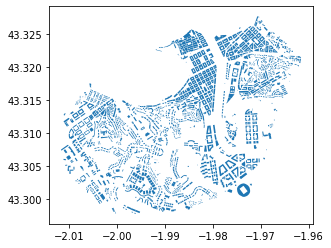

In [100]:
filtered_gdf_building.plot()

In [101]:
# save as a shapefile
filtered_gdf_building = filtered_gdf_building.applymap(lambda x: str(x) if isinstance(x, list) else x)
filtered_gdf_building.drop(labels="nodes", axis=1).to_file("./buildings-small.gpkg", driver="GPKG")

#POSTprocesses buildings in QGIS


In [7]:
G_clipped_drive = ox.graph_from_polygon(poly, network_type="drive")

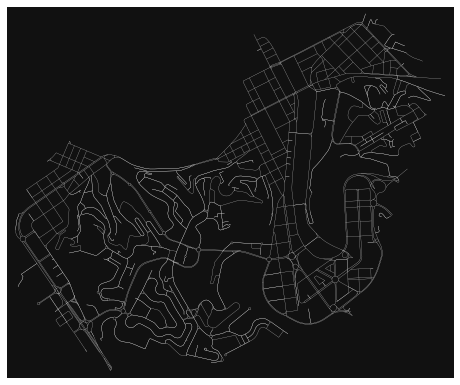

In [8]:
fig, ax = ox.plot_graph(G_clipped_drive, node_size=0, edge_color="w", edge_linewidth=0.2)

In [9]:
G_hc_proj=ox.project_graph(G_clipped_drive)
ox.save_graph_shapefile(G_hc_proj, filepath="./roads/ss_drive_small.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [10]:
G_clipped_walk = ox.graph_from_polygon(poly, network_type="walk")

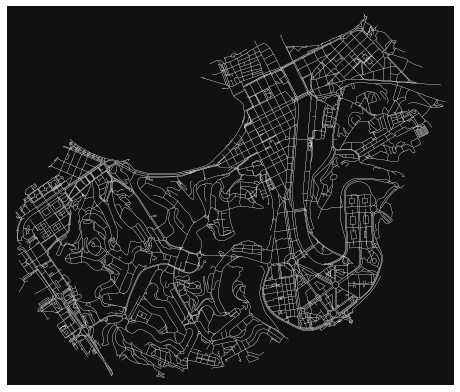

In [11]:
fig, ax = ox.plot_graph(G_clipped_walk, node_size=0, edge_color="w", edge_linewidth=0.2)

In [12]:
G_hc_proj=ox.project_graph(G_clipped_walk)
ox.save_graph_shapefile(G_hc_proj, filepath="./roads/ss_walk_small.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [13]:
G_clipped_bike = ox.graph_from_polygon(poly, network_type="bike")

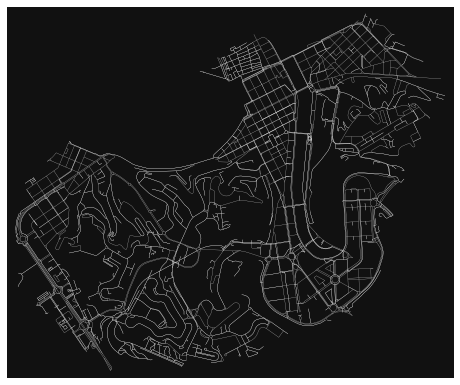

In [14]:
fig, ax = ox.plot_graph(G_clipped_bike, node_size=0, edge_color="w", edge_linewidth=0.2)

In [15]:
G_hc_proj=ox.project_graph(G_clipped_bike)
ox.save_graph_shapefile(G_hc_proj, filepath="./roads/ss_bike_small.shp")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [16]:
from shapely.geometry import Point  #Polygon
import pandas as pd

In [17]:
demand_raw = pd.read_csv("./Deliveries/SanSebastian_Sept2023granular.csv")
demand_raw

,order_activated_local_at,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,pickup_latitude,pickup_longitude,delivery_latitude,delivery_longitude
0,2023-09-10 20:32:46.000 UTC,Food,DeliveredStatus,676.11960,725.37024,5.808333,28.750000,89184bb3633ffff,89184bb362bffff,MOTORBIKE,43.310548,-2.007950,43.305862,-2.014189
1,2023-09-09 20:33:30.000 UTC,Food,DeliveredStatus,1895.74110,1921.56090,19.016667,19.333333,89184bb3353ffff,89184bb3073ffff,MOTORBIKE,43.281029,-2.016250,43.293740,-2.000166
2,2023-09-16 20:45:32.000 UTC,Food,DeliveredStatus,1424.51780,442.55580,21.175000,32.633333,89184bb348fffff,89184bb3403ffff,BICYCLE,43.321402,-1.981619,43.318036,-1.984533
3,2023-09-17 21:52:00.000 UTC,Food,DeliveredStatus,1990.12830,256.70667,12.933333,37.750000,89184bb3627ffff,89184bb30cbffff,MOTORBIKE,43.303562,-2.007236,43.305074,-2.004837
4,2023-09-05 22:23:47.000 UTC,Food,DeliveredStatus,1442.23430,2313.71440,24.700000,26.716667,89184bb3483ffff,89184949babffff,MOTORBIKE,43.323788,-1.978777,43.318036,-1.951291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48051,2023-09-30 19:47:17.000 UTC,Food,DeliveredStatus,1170.48650,1457.26620,29.300000,39.800000,89184bb3417ffff,89184bb346bffff,MOTORBIKE,43.318933,-1.980320,43.311274,-1.994939
48052,2023-09-06 13:28:44.000 UTC,Food,DeliveredStatus,1449.43370,2266.17750,17.441667,36.216667,89184bb26cfffff,89184949b4fffff,MOTORBIKE,43.309279,-1.943679,43.319021,-1.968284
48053,2023-09-22 19:20:39.000 UTC,Food,DeliveredStatus,292.16880,1161.33170,22.483333,24.783333,89184bb3407ffff,89184bb348bffff,BICYCLE,43.313680,-1.982770,43.324088,-1.981616
48054,2023-09-11 13:44:21.000 UTC,Food,DeliveredStatus,30.61201,915.62400,16.916667,20.100000,89184bb3497ffff,89184bb34c7ffff,BICYCLE,43.324637,-1.975900,43.323525,-1.987115


In [18]:
demand_raw = demand_raw.loc[demand_raw['order_final_status']== 'DeliveredStatus']
len(demand_raw)

46814

In [19]:
demand_raw = demand_raw.loc[demand_raw['order_vertical']== 'Food']
len(demand_raw)

43074

In [20]:
# Remove rows with NaN or empty values in specified columns
demand_raw = demand_raw.dropna(subset=['pickup_latitude', 'pickup_longitude', 'delivery_latitude', 'delivery_longitude'])

# Reset the DataFrame index if you want
demand_raw = demand_raw.reset_index(drop=True)

len(demand_raw)

34519

In [21]:

demand_raw['order_activated_local_at'] = pd.to_datetime(demand_raw['order_activated_local_at'], format='%Y-%m-%d %H:%M:%S.%f UTC')
demand_raw['start_time'] = demand_raw['order_activated_local_at'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [22]:
# DATE FILTER
start_date = "2023-09-18 00:00:00"
end_date = "2023-09-25 00:00:00"
demand_raw = demand_raw[demand_raw["start_time"].between(start_date, end_date)]

# ROUNDTRIP FILTER
#demand_raw = demand_raw[demand_raw["start station id"] != demand_raw["end station id"]]

In [23]:
demand_raw

,order_activated_local_at,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,pickup_latitude,pickup_longitude,delivery_latitude,delivery_longitude,start_time
8,2023-09-21 13:07:48,Food,DeliveredStatus,142.13834,548.5517,16.566667,16.833333,89184bb3417ffff,89184bb3487ffff,BICYCLE,43.317047,-1.979845,43.321687,-1.977537,2023-09-21 13:07:48
20,2023-09-22 22:50:04,Food,DeliveredStatus,205.96344,2490.4622,12.750000,21.066667,89184bb26cfffff,89184bb24cfffff,MOTORBIKE,43.309279,-1.943679,43.310379,-1.912936,2023-09-22 22:50:04
21,2023-09-24 14:00:38,Food,DeliveredStatus,256.78506,549.3911,11.833333,13.116667,89184bb3483ffff,89184949b4bffff,BICYCLE,43.323788,-1.978777,43.323539,-1.971994,2023-09-24 14:00:38
25,2023-09-18 20:29:03,Food,DeliveredStatus,120.18553,1053.2880,10.441667,27.483333,89184bb3417ffff,89184bb3427ffff,BICYCLE,43.317047,-1.979845,43.307581,-1.980386,2023-09-18 20:29:03
28,2023-09-22 09:44:43,Food,DeliveredStatus,2189.66750,2723.3823,22.966667,23.000000,89184bb3497ffff,89184bb36bbffff,MOTORBIKE,43.324664,-1.975841,43.314814,-2.006663,2023-09-22 09:44:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34498,2023-09-21 13:03:18,Food,DeliveredStatus,353.69553,1781.5243,14.883333,19.166667,89184bb3497ffff,89184bb35c3ffff,BICYCLE,43.324637,-1.975900,43.308895,-1.971813,2023-09-21 13:03:18
34504,2023-09-22 17:43:41,Food,DeliveredStatus,3380.90840,1421.1024,30.883333,31.150000,89184bb3407ffff,89184949b7bffff,MOTORBIKE,43.314044,-1.982582,43.318384,-1.966059,2023-09-22 17:43:41
34508,2023-09-22 20:32:56,Food,DeliveredStatus,514.94403,1788.0896,12.741667,42.416667,89184bb3413ffff,89184bb355bffff,BICYCLE,43.320525,-1.983317,43.304530,-1.981039,2023-09-22 20:32:56
34509,2023-09-22 14:02:06,Food,DeliveredStatus,2767.82180,2738.4760,32.716667,32.883333,89184bb3487ffff,89184bb36afffff,CAR,43.322132,-1.974437,43.309856,-2.003781,2023-09-22 14:02:06


In [24]:
# add new column to df
demand_raw['withinC'] = ""

#Determine if it is inside or not
startwithinClist = []
for lon,lat in zip(demand_raw['pickup_longitude'],demand_raw['pickup_latitude']):
    pt = Point(lon, lat)
    startwithinC = pt.within(poly)
    #print( withinQ )
    startwithinClist.append(startwithinC)

# update values in the that column, values: True/False
demand_raw['withinC'] = startwithinClist

In [25]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_start_within = demand_raw[demand_raw.withinC==True]
demand_start_within

,order_activated_local_at,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,pickup_latitude,pickup_longitude,delivery_latitude,delivery_longitude,start_time,withinC
8,2023-09-21 13:07:48,Food,DeliveredStatus,142.13834,548.5517,16.566667,16.833333,89184bb3417ffff,89184bb3487ffff,BICYCLE,43.317047,-1.979845,43.321687,-1.977537,2023-09-21 13:07:48,True
21,2023-09-24 14:00:38,Food,DeliveredStatus,256.78506,549.3911,11.833333,13.116667,89184bb3483ffff,89184949b4bffff,BICYCLE,43.323788,-1.978777,43.323539,-1.971994,2023-09-24 14:00:38,True
25,2023-09-18 20:29:03,Food,DeliveredStatus,120.18553,1053.2880,10.441667,27.483333,89184bb3417ffff,89184bb3427ffff,BICYCLE,43.317047,-1.979845,43.307581,-1.980386,2023-09-18 20:29:03,True
28,2023-09-22 09:44:43,Food,DeliveredStatus,2189.66750,2723.3823,22.966667,23.000000,89184bb3497ffff,89184bb36bbffff,MOTORBIKE,43.324664,-1.975841,43.314814,-2.006663,2023-09-22 09:44:43,True
34,2023-09-24 14:13:34,Food,DeliveredStatus,1350.33830,442.9490,27.266667,30.066667,89184bb3407ffff,89184bb3477ffff,MOTORBIKE,43.314044,-1.982582,43.311710,-1.987018,2023-09-24 14:13:34,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34498,2023-09-21 13:03:18,Food,DeliveredStatus,353.69553,1781.5243,14.883333,19.166667,89184bb3497ffff,89184bb35c3ffff,BICYCLE,43.324637,-1.975900,43.308895,-1.971813,2023-09-21 13:03:18,True
34504,2023-09-22 17:43:41,Food,DeliveredStatus,3380.90840,1421.1024,30.883333,31.150000,89184bb3407ffff,89184949b7bffff,MOTORBIKE,43.314044,-1.982582,43.318384,-1.966059,2023-09-22 17:43:41,True
34508,2023-09-22 20:32:56,Food,DeliveredStatus,514.94403,1788.0896,12.741667,42.416667,89184bb3413ffff,89184bb355bffff,BICYCLE,43.320525,-1.983317,43.304530,-1.981039,2023-09-22 20:32:56,True
34509,2023-09-22 14:02:06,Food,DeliveredStatus,2767.82180,2738.4760,32.716667,32.883333,89184bb3487ffff,89184bb36afffff,CAR,43.322132,-1.974437,43.309856,-2.003781,2023-09-22 14:02:06,True


In [26]:
# add new column to df
demand_start_within['withinCend'] = ""

#Determine if it is inside or not
endwithinClist = []
for lon,lat in zip(demand_start_within['delivery_longitude'],demand_start_within['delivery_latitude']):
    pt = Point(lon, lat)
    endwithinC = pt.within(poly)
    #print( withinQ )
    endwithinClist.append(endwithinC)

# update values in the that column, values: True/False
demand_start_within['withinCend'] = endwithinClist

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [27]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_ss= demand_start_within[demand_start_within.withinCend==True]
demand_ss

,order_activated_local_at,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,pickup_latitude,pickup_longitude,delivery_latitude,delivery_longitude,start_time,withinC,withinCend
8,2023-09-21 13:07:48,Food,DeliveredStatus,142.13834,548.5517,16.566667,16.833333,89184bb3417ffff,89184bb3487ffff,BICYCLE,43.317047,-1.979845,43.321687,-1.977537,2023-09-21 13:07:48,True,True
21,2023-09-24 14:00:38,Food,DeliveredStatus,256.78506,549.3911,11.833333,13.116667,89184bb3483ffff,89184949b4bffff,BICYCLE,43.323788,-1.978777,43.323539,-1.971994,2023-09-24 14:00:38,True,True
25,2023-09-18 20:29:03,Food,DeliveredStatus,120.18553,1053.2880,10.441667,27.483333,89184bb3417ffff,89184bb3427ffff,BICYCLE,43.317047,-1.979845,43.307581,-1.980386,2023-09-18 20:29:03,True,True
28,2023-09-22 09:44:43,Food,DeliveredStatus,2189.66750,2723.3823,22.966667,23.000000,89184bb3497ffff,89184bb36bbffff,MOTORBIKE,43.324664,-1.975841,43.314814,-2.006663,2023-09-22 09:44:43,True,True
34,2023-09-24 14:13:34,Food,DeliveredStatus,1350.33830,442.9490,27.266667,30.066667,89184bb3407ffff,89184bb3477ffff,MOTORBIKE,43.314044,-1.982582,43.311710,-1.987018,2023-09-24 14:13:34,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34498,2023-09-21 13:03:18,Food,DeliveredStatus,353.69553,1781.5243,14.883333,19.166667,89184bb3497ffff,89184bb35c3ffff,BICYCLE,43.324637,-1.975900,43.308895,-1.971813,2023-09-21 13:03:18,True,True
34504,2023-09-22 17:43:41,Food,DeliveredStatus,3380.90840,1421.1024,30.883333,31.150000,89184bb3407ffff,89184949b7bffff,MOTORBIKE,43.314044,-1.982582,43.318384,-1.966059,2023-09-22 17:43:41,True,True
34508,2023-09-22 20:32:56,Food,DeliveredStatus,514.94403,1788.0896,12.741667,42.416667,89184bb3413ffff,89184bb355bffff,BICYCLE,43.320525,-1.983317,43.304530,-1.981039,2023-09-22 20:32:56,True,True
34509,2023-09-22 14:02:06,Food,DeliveredStatus,2767.82180,2738.4760,32.716667,32.883333,89184bb3487ffff,89184bb36afffff,CAR,43.322132,-1.974437,43.309856,-2.003781,2023-09-22 14:02:06,True,True


In [28]:
#Order by starttime
demand_ss = demand_ss.sort_values(by='start_time', ascending=True)


In [29]:
#Drop
demand_ss = demand_ss.drop(columns=['order_activated_local_at','withinC','withinCend'])

In [30]:
#Reorder columns to move 'starttime' to the first position
demand_ss = demand_ss[['start_time'] + [col for col in demand_ss.columns if col != 'start_time']]

In [31]:

demand_ss = demand_ss.rename(columns={'pickup_latitude': 'start_latitude', 'pickup_longitude': 'start_longitude', 'delivery_latitude': 'end_latitude', 'delivery_longitude': 'end_longitude'})

In [32]:
demand_ss

,start_time,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,start_latitude,start_longitude,end_latitude,end_longitude
12760,2023-09-18 09:31:39,Food,DeliveredStatus,143.59972,171.05913,9.350000,12.650000,89184bb3497ffff,89184bb3497ffff,BICYCLE,43.324664,-1.975841,43.324337,-1.973775
12508,2023-09-18 10:04:56,Food,DeliveredStatus,1199.57040,1096.33860,14.533333,29.083333,89184bb3413ffff,89184bb3463ffff,BICYCLE,43.319009,-1.983898,43.312050,-1.993499
25188,2023-09-18 10:16:05,Food,DeliveredStatus,780.57480,1496.59310,25.116667,44.816667,89184bb348fffff,89184bb3463ffff,MOTORBIKE,43.320081,-1.981241,43.309518,-1.992705
17737,2023-09-18 10:22:29,Food,DeliveredStatus,674.26150,479.59625,13.450000,16.400000,89184bb3413ffff,89184bb3407ffff,BICYCLE,43.319009,-1.983898,43.314906,-1.982061
27435,2023-09-18 10:49:33,Food,DeliveredStatus,355.18320,1558.99020,31.700000,54.616667,89184bb35cfffff,89184bb3407ffff,MOTORBIKE,43.304142,-1.973532,43.315758,-1.984322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,2023-09-24 23:01:46,Food,DeliveredStatus,2439.55600,841.59980,32.600000,38.933333,89184bb3633ffff,89184bb346bffff,MOTORBIKE,43.307749,-2.008162,43.310628,-1.998541
4702,2023-09-24 23:06:27,Food,DeliveredStatus,1628.83200,550.71490,19.350000,23.666667,89184bb3633ffff,89184bb36a3ffff,MOTORBIKE,43.307749,-2.008162,43.312130,-2.004983
15331,2023-09-24 23:11:29,Food,DeliveredStatus,473.67685,1487.44710,12.450000,23.683333,89184bb3417ffff,89184bb35cbffff,BICYCLE,43.318830,-1.980115,43.305908,-1.975353
30591,2023-09-24 23:14:07,Food,DeliveredStatus,604.72296,2818.85720,18.350000,31.233333,89184bb3417ffff,89184bb3053ffff,MOTORBIKE,43.318830,-1.980115,43.300658,-2.004410


In [33]:
demand_ss['day']  = pd.to_datetime(demand_ss['start_time']).dt.day - 17

In [34]:
demand_ss.head()

,start_time,order_vertical,order_final_status,start_to_pickup_flight_distance_in_meters,pickup_to_delivery_flight_distance_in_meters,courier_delivery_time_in_minutes,customer_delivery_time_in_minutes,pickup_hexagon_id,delivery_hexagon_id,vehicle_type,start_latitude,start_longitude,end_latitude,end_longitude,day
12760,2023-09-18 09:31:39,Food,DeliveredStatus,143.59972,171.05913,9.350000,12.650000,89184bb3497ffff,89184bb3497ffff,BICYCLE,43.324664,-1.975841,43.324337,-1.973775,1
12508,2023-09-18 10:04:56,Food,DeliveredStatus,1199.57040,1096.33860,14.533333,29.083333,89184bb3413ffff,89184bb3463ffff,BICYCLE,43.319009,-1.983898,43.312050,-1.993499,1
25188,2023-09-18 10:16:05,Food,DeliveredStatus,780.57480,1496.59310,25.116667,44.816667,89184bb348fffff,89184bb3463ffff,MOTORBIKE,43.320081,-1.981241,43.309518,-1.992705,1
17737,2023-09-18 10:22:29,Food,DeliveredStatus,674.26150,479.59625,13.450000,16.400000,89184bb3413ffff,89184bb3407ffff,BICYCLE,43.319009,-1.983898,43.314906,-1.982061,1
27435,2023-09-18 10:49:33,Food,DeliveredStatus,355.18320,1558.99020,31.700000,54.616667,89184bb35cfffff,89184bb3407ffff,MOTORBIKE,43.304142,-1.973532,43.315758,-1.984322,1


In [35]:
demand_ss.to_csv("./Deliveries/delivery_demand_ss_1week_scattered_small.csv", index=False)

In [41]:
stations  = pd.read_csv("./Rides/estaciones.csv")
stations

,ID,ESTACIÓN,NumPlazas,Descuento,NomCalle,Portal,X_etrs89,Y_etrs89,X,Y
0,2,Bretxa,15,NO,"BOULEVARD,AL DEL",2,582504.71,4797172.37,-220683.662658,5.361245e+06
1,3,Santa Katalina Plazatxoa,15,NO,SANTA CATALINA,1,582700.51,4796998.85,-220417.793693,5.361003e+06
2,4,Andia,23,NO,ANDIA,1,582497.36,4796912.09,-220698.113023,5.360887e+06
3,5,San Marcial,15,NO,SAN MARCIAL,11,582651.45,4796772.21,-220488.939914,5.360692e+06
4,6,Arrasate,16,NO,ARRASATE,18,582584.80,4796670.95,-220582.112890,5.360553e+06
...,...,...,...,...,...,...,...,...,...,...
62,73,Ferrerias,15,NO,"FERRERIAS, PL",7,583077.60,4794957.83,-219934.523655,5.358185e+06
63,74,Zuhaizti,19,NO,"ZUHAIZTI, PL",,583139.22,4796994.63,-219815.645743,5.360990e+06
64,75,Moraza,19,NO,MORAZA,1,NaN,NaN,NaN,NaN
65,76,Zabaleta,19,NO,ZABALETA,35,583151.89,4797347.52,-219792.298528,5.361476e+06


In [42]:
transformer = Transformer.from_crs("EPSG:3857", "EPSG:4326")

def transform_coordinates(row):
    lat, lon = transformer.transform(row['X'], row['Y'])
    return pd.Series({'Latitude': lat, 'Longitude': lon})


stations[['Latitude', 'Longitude']] = stations.apply(transform_coordinates, axis=1)


In [43]:
stations

,ID,ESTACIÓN,NumPlazas,Descuento,NomCalle,Portal,X_etrs89,Y_etrs89,X,Y,Latitude,Longitude
0,2,Bretxa,15,NO,"BOULEVARD,AL DEL",2,582504.71,4797172.37,-220683.662658,5.361245e+06,43.322867,-1.982435
1,3,Santa Katalina Plazatxoa,15,NO,SANTA CATALINA,1,582700.51,4796998.85,-220417.793693,5.361003e+06,43.321284,-1.980047
2,4,Andia,23,NO,ANDIA,1,582497.36,4796912.09,-220698.113023,5.360887e+06,43.320525,-1.982565
3,5,San Marcial,15,NO,SAN MARCIAL,11,582651.45,4796772.21,-220488.939914,5.360692e+06,43.319248,-1.980686
4,6,Arrasate,16,NO,ARRASATE,18,582584.80,4796670.95,-220582.112890,5.360553e+06,43.318344,-1.981523
...,...,...,...,...,...,...,...,...,...,...,...,...
62,73,Ferrerias,15,NO,"FERRERIAS, PL",7,583077.60,4794957.83,-219934.523655,5.358185e+06,43.302866,-1.975705
63,74,Zuhaizti,19,NO,"ZUHAIZTI, PL",,583139.22,4796994.63,-219815.645743,5.360990e+06,43.321197,-1.974638
64,75,Moraza,19,NO,MORAZA,1,NaN,NaN,NaN,NaN,NaN,NaN
65,76,Zabaleta,19,NO,ZABALETA,35,583151.89,4797347.52,-219792.298528,5.361476e+06,43.324373,-1.974428


In [44]:
stations.loc[stations['ID']==75,['Latitude','Longitude']]=[43.314847, -1.979881]

In [45]:
stations

,ID,ESTACIÓN,NumPlazas,Descuento,NomCalle,Portal,X_etrs89,Y_etrs89,X,Y,Latitude,Longitude
0,2,Bretxa,15,NO,"BOULEVARD,AL DEL",2,582504.71,4797172.37,-220683.662658,5.361245e+06,43.322867,-1.982435
1,3,Santa Katalina Plazatxoa,15,NO,SANTA CATALINA,1,582700.51,4796998.85,-220417.793693,5.361003e+06,43.321284,-1.980047
2,4,Andia,23,NO,ANDIA,1,582497.36,4796912.09,-220698.113023,5.360887e+06,43.320525,-1.982565
3,5,San Marcial,15,NO,SAN MARCIAL,11,582651.45,4796772.21,-220488.939914,5.360692e+06,43.319248,-1.980686
4,6,Arrasate,16,NO,ARRASATE,18,582584.80,4796670.95,-220582.112890,5.360553e+06,43.318344,-1.981523
...,...,...,...,...,...,...,...,...,...,...,...,...
62,73,Ferrerias,15,NO,"FERRERIAS, PL",7,583077.60,4794957.83,-219934.523655,5.358185e+06,43.302866,-1.975705
63,74,Zuhaizti,19,NO,"ZUHAIZTI, PL",,583139.22,4796994.63,-219815.645743,5.360990e+06,43.321197,-1.974638
64,75,Moraza,19,NO,MORAZA,1,NaN,NaN,NaN,NaN,43.314847,-1.979881
65,76,Zabaleta,19,NO,ZABALETA,35,583151.89,4797347.52,-219792.298528,5.361476e+06,43.324373,-1.974428


In [46]:

stations = stations.rename(columns={'NumPlazas': 'Total docks'})

In [47]:
stations.head(2)

,ID,ESTACIÓN,Total docks,Descuento,NomCalle,Portal,X_etrs89,Y_etrs89,X,Y,Latitude,Longitude
0,2,Bretxa,15,NO,"BOULEVARD,AL DEL",2,582504.71,4797172.37,-220683.662658,5.361245e+06,43.322867,-1.982435
1,3,Santa Katalina Plazatxoa,15,NO,SANTA CATALINA,1,582700.51,4796998.85,-220417.793693,5.361003e+06,43.321284,-1.980047


In [48]:
stations.to_csv("./Rides/stations_ed.csv", index=False)

In [79]:
demand_rides = pd.read_csv("./Rides/ride_demand_ss_1week_scattered.csv")

In [80]:
#demand_rides = pd.read_csv("./Rides/datos_2022.csv",  sep = ";",encoding="ISO-8859-1")
demand_rides

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,Nombre de producto,start_lat,start_lon,target_lat,target_lon,starttime,withinC,withinCend,start_building,target_building
0,0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,...,Dbizi Ordinario,43.309668,-1.968903,43.316964,-1.965375,2022-09-19 06:00:00,True,True,454,2894
1,1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,...,Ordinario,43.316565,-1.968646,43.312481,-1.982686,2022-09-19 06:03:00,True,True,2933,3645
2,2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,...,Ordinario,43.324382,-1.961079,43.318836,-1.954590,2022-09-19 06:04:00,True,True,4206,1222
3,3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,...,Dbizi Ocasional,43.320434,-1.971288,43.319021,-1.968803,2022-09-19 06:05:00,True,True,1901,1572
4,4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,...,Ordinario,43.318928,-1.970316,43.307302,-1.968788,2022-09-19 06:08:00,True,True,1602,4856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,19350,217450,1186178,NORMAL,230,2,2022-09-25 23:56:00,02 - BRETXA,25/09/2022 23:59,14.0,...,Ordinario,43.323222,-1.987862,43.326514,-1.967924,2022-09-25 23:56:00,True,True,93,963
19294,19351,217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,...,Ordinario,43.318085,-1.983017,43.309404,-1.986846,2022-09-25 23:57:00,True,True,2,5853
19295,19352,217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,...,Dbizi Ocasional,43.322148,-1.981923,43.317195,-1.967964,2022-09-25 23:57:00,True,True,528,885
19296,19353,217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,...,Dbizi Ocasional,43.326328,-1.967995,43.314373,-1.986968,2022-09-25 23:58:00,True,True,953,3663


In [81]:
demand_rides.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'start_building', 'target_building'],
      dtype='object')

In [82]:
demand_rides = demand_rides.rename(columns={'ID': 'ID_viaje'})


In [83]:
demand_rides.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'start_building', 'target_building'],
      dtype='object')

In [84]:

# Start station
demand_rides = demand_rides.merge(stations[['ID', 'Latitude', 'Longitude']], left_on='Id de estacion de inicio', right_on='ID', how='left')
demand_rides = demand_rides.rename(columns={'Latitude': 'start_lat', 'Longitude': 'start_lon'})

# End station
demand_rides = demand_rides.merge(stations[['ID', 'Latitude', 'Longitude']], left_on='Id de estacion de fin de viaje', right_on='ID', how='left')
demand_rides = demand_rides.rename(columns={'Latitude': 'target_lat', 'Longitude': 'target_lon'})


In [85]:
demand_rides.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID_viaje', 'Estado cerrado', 'Duracion',
       'Id de estacion de inicio', 'Fecha de inicio',
       'Nombre de estacion de inicio', 'Fecha de fin',
       'Id de estacion de fin de viaje', 'Nombre de estacion de fin de viaje',
       'ID de ciclista', 'Msnbc de bicicleta', 'Moto identificador publico',
       'Modelo de bicicleta', 'Nombre de producto', 'start_lat', 'start_lon',
       'target_lat', 'target_lon', 'starttime', 'withinC', 'withinCend',
       'start_building', 'target_building', 'ID_x', 'start_lat', 'start_lon',
       'ID_y', 'target_lat', 'target_lon'],
      dtype='object')

In [86]:

# Drop the duplicate 'station_id' columns
demand_rides = demand_rides.drop(columns=['ID_x', 'ID_y'])


In [87]:
demand_rides

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,target_lon,starttime,withinC,withinCend,start_building,target_building,start_lat,start_lon,target_lat,target_lon
0,0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,...,-1.965375,2022-09-19 06:00:00,True,True,454,2894,43.312025,-1.972148,43.317856,-1.977321
1,1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,...,-1.982686,2022-09-19 06:03:00,True,True,2933,3645,43.316951,-1.971451,43.313289,-1.981765
2,2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,...,-1.954590,2022-09-19 06:04:00,True,True,4206,1222,43.321269,-1.959826,43.316630,-1.953499
3,3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,...,-1.968803,2022-09-19 06:05:00,True,True,1901,1572,43.316951,-1.971451,43.317038,-1.975053
4,4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,...,-1.968788,2022-09-19 06:08:00,True,True,1602,4856,43.316951,-1.971451,43.310829,-1.967450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,19350,217450,1186178,NORMAL,230,2,2022-09-25 23:56:00,02 - BRETXA,25/09/2022 23:59,14.0,...,-1.967924,2022-09-25 23:56:00,True,True,93,963,43.322867,-1.982435,43.323776,-1.971474
19294,19351,217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,...,-1.986846,2022-09-25 23:57:00,True,True,2,5853,43.319248,-1.980686,43.308489,-1.983002
19295,19352,217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,...,-1.967964,2022-09-25 23:57:00,True,True,528,885,43.322755,-1.975424,43.316951,-1.971451
19296,19353,217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,...,-1.986968,2022-09-25 23:58:00,True,True,953,3663,43.324163,-1.973362,43.311096,-1.980431


In [88]:
#demand_rides['Fecha de inicio'] = pd.to_datetime(demand_rides['Fecha de inicio'], format='%d/%m/%Y %H:%M')
#demand_rides['starttime'] = demand_rides['Fecha de inicio'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [89]:
# DATE FILTER
start_date = "2022-09-19 00:00:00"
end_date = "2022-09-26 00:00:00"
demand_rides = demand_rides[demand_rides["starttime"].between(start_date, end_date)]


In [90]:
#Order by starttime
demand_rides = demand_rides.sort_values(by='starttime', ascending=True)

In [91]:
demand_rides

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,target_lon,starttime,withinC,withinCend,start_building,target_building,start_lat,start_lon,target_lat,target_lon
0,0,237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,...,-1.965375,2022-09-19 06:00:00,True,True,454,2894,43.312025,-1.972148,43.317856,-1.977321
1,1,237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,...,-1.982686,2022-09-19 06:03:00,True,True,2933,3645,43.316951,-1.971451,43.313289,-1.981765
2,2,237516,1164532,NORMAL,274,16,2022-09-19 06:04:00,16 - ATARIZAR,19/09/2022 6:08,52.0,...,-1.954590,2022-09-19 06:04:00,True,True,4206,1222,43.321269,-1.959826,43.316630,-1.953499
3,3,237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,...,-1.968803,2022-09-19 06:05:00,True,True,1901,1572,43.316951,-1.971451,43.317038,-1.975053
4,4,237514,1164534,NORMAL,306,21,2022-09-19 06:08:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:13,32.0,...,-1.968788,2022-09-19 06:08:00,True,True,1602,4856,43.316951,-1.971451,43.310829,-1.967450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19293,19350,217450,1186178,NORMAL,230,2,2022-09-25 23:56:00,02 - BRETXA,25/09/2022 23:59,14.0,...,-1.967924,2022-09-25 23:56:00,True,True,93,963,43.322867,-1.982435,43.323776,-1.971474
19294,19351,217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,...,-1.986846,2022-09-25 23:57:00,True,True,2,5853,43.319248,-1.980686,43.308489,-1.983002
19295,19352,217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,...,-1.967964,2022-09-25 23:57:00,True,True,528,885,43.322755,-1.975424,43.316951,-1.971451
19296,19353,217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,...,-1.986968,2022-09-25 23:58:00,True,True,953,3663,43.324163,-1.973362,43.311096,-1.980431


In [92]:

# ROUNDTRIP FILTER
demand_rides = demand_rides[demand_rides["Id de estacion de inicio"] != demand_rides["Id de estacion de fin de viaje"]]
demand_rides.shape

(19298, 29)

In [62]:
# Just for clipping
#demand_rides = pd.read_csv('./Rides/ride_demand_ss_1week_scattered.csv')

In [96]:
#Location filters

# add new column to df
demand_rides['withinC'] = ""

#Determine if it is inside or not
startwithinClist = []
for lon,lat in zip(demand_rides['start_lon'],demand_rides['start_lat']):
    pt = Point(lon, lat)
    startwithinC = pt.within(poly)
    #print( withinQ )
    startwithinClist.append(startwithinC)

# update values in the that column, values: True/False
demand_rides['withinC'] = startwithinClist

TypeError: must be real number, not str

In [95]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_start_within = demand_rides[demand_rides.withinC==True]
demand_start_within

,Unnamed: 0,Unnamed: 0.1,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,...,target_lon,starttime,withinC,withinCend,start_building,target_building,start_lat,start_lon,target_lat,target_lon


In [65]:
# add new column to df
demand_start_within['withinCend'] = ""

#Determine if it is inside or not
endwithinClist = []
for lon,lat in zip(demand_start_within['target_lon'],demand_start_within['target_lat']):
    pt = Point(lon, lat)
    endwithinC = pt.within(poly)
    #print( withinQ )
    endwithinClist.append(endwithinC)

# update values in the that column, values: True/False
demand_start_within['withinCend'] = endwithinClist

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [66]:
# select points with start within SS, assign to `demand_start_within` dataframe
demand_ss_rides= demand_start_within[demand_start_within.withinCend==True]
demand_ss_rides

,ID_viaje,Estado cerrado,Duracion,Id de estacion de inicio,Fecha de inicio,Nombre de estacion de inicio,Fecha de fin,Id de estacion de fin de viaje,Nombre de estacion de fin de viaje,ID de ciclista,...,Moto identificador publico,Modelo de bicicleta,Nombre de producto,start_lat,start_lon,target_lat,target_lon,starttime,withinC,withinCend
237518,1164530,NORMAL,489,31,2022-09-19 06:00:00,31 - BARCELONA,19/09/2022 6:08,19.0,19 - FRANTZIA PASEALEKUA,21767,...,748.0,EFIT,Dbizi Ordinario,43.312025,-1.972148,43.317856,-1.977321,2022-09-19 06:00:00,True,True
237517,1164531,NORMAL,480,21,2022-09-19 06:03:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:11,9.0,09 - EASO,2133,...,77.0,FIT,Ordinario,43.316951,-1.971451,43.313289,-1.981765,2022-09-19 06:03:00,True,True
237515,1164533,NORMAL,101,21,2022-09-19 06:05:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:06,20.0,20 - TABAKALERA,15465,...,746.0,EFIT,Dbizi Ocasional,43.316951,-1.971451,43.317038,-1.975053,2022-09-19 06:05:00,True,True
237513,1164535,NORMAL,539,27,2022-09-19 06:10:00,27 - PODAVINES,19/09/2022 6:19,19.0,19 - FRANTZIA PASEALEKUA,14053,...,738.0,EFIT,Ordinario,43.302707,-1.979912,43.317856,-1.977321,2022-09-19 06:10:00,True,True
237512,1164550,NORMAL,336,21,2022-09-19 06:24:00,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,19/09/2022 6:30,11.0,11 - SAN FRANTZISKO-IPARRAGIRRE,21479,...,53.0,FIT,Dbizi Ocasional,43.316951,-1.971451,43.322755,-1.975424,2022-09-19 06:24:00,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217449,1186179,NORMAL,877,5,2022-09-25 23:57:00,05 - SAN MARTZIAL,26/09/2022 0:11,24.0,24 - MORLANS,13945,...,188.0,FIT,Ordinario,43.319248,-1.980686,43.308489,-1.983002,2022-09-25 23:57:00,True,True
217448,1186180,NORMAL,216,11,2022-09-25 23:57:00,11 - SAN FRANTZISKO-IPARRAGIRRE,26/09/2022 0:01,21.0,21 - KARMENGO ANDRE MARIA / VIRGEN DEL CARMEN,22702,...,820.0,EFIT,Dbizi Ocasional,43.322755,-1.975424,43.316951,-1.971451,2022-09-25 23:57:00,True,True
217447,1186181,NORMAL,641,12,2022-09-25 23:58:00,12 - S.FRANTZISKO-GALTZADA NAGUSIA / GRAN VÍA,26/09/2022 0:09,22.0,22 - ANTSO JAKITUNA / SANCHO EL SABIO,18255,...,271.0,FIT,Dbizi Ocasional,43.324163,-1.973362,43.311096,-1.980431,2022-09-25 23:58:00,True,True
217446,1186182,NORMAL,229,6,2022-09-25 23:58:00,06 - ARRASATE,26/09/2022 0:02,10.0,10 - PEÑA Y GOÑI,3701,...,755.0,EFIT,Dbizi Ordinario,43.318344,-1.981523,43.322724,-1.977299,2022-09-25 23:58:00,True,True


In [67]:
demand_ss_rides.to_csv('./Rides/ride_demand_ss_1_week_scattered_small.csv')

****************************************************************************************************************************************************